In [1]:
from IPython.display import clear_output
import time
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Ejercicio Lennard Jones

In [3]:
def LennardJones(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, epsilon=1, sigma=1):
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy

In [4]:
def Plotter(e):

    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(122)

    return ax1

In [5]:
class Robot:

    def __init__(self,f,Id,n=50,rate=0.1):
        self.Id = Id
        self.rate = rate
        self.Fitness = np.inf
        self.n = n
        self.f = f
        self.r = np.random.uniform(0,20, size=(self.n,3)) #Cada robot será un array de 50 posiciones en R3

    def Mutate(self):
        self.r += np.random.normal(loc=0., scale = self.rate, size=(self.n,3)) #Definimos la función de mutación.

    def GetR(self):
        return self.r

    def SetFitness(self):
        self.Fitness = self.f(self.GetR())
        if self.Fitness < -6.5:
            self.rate = 0.005
            
    def GetFitness(self):
        return self.Fitness

In [6]:
def GetRobots(N):
    Robots = []
    for i in range(N):
        r = Robot(f=TotalEnergy,Id=i)
        Robots.append(r)
    return Robots

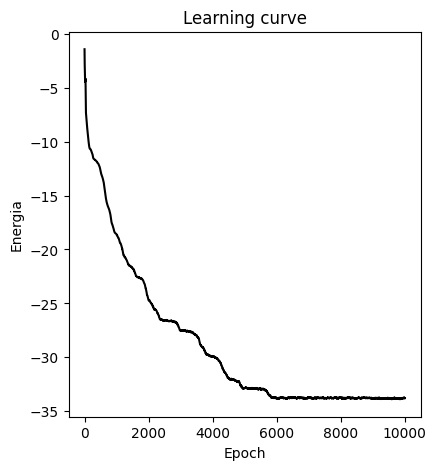

La mejor configuración encontrada está dada por la gráfica en R3:


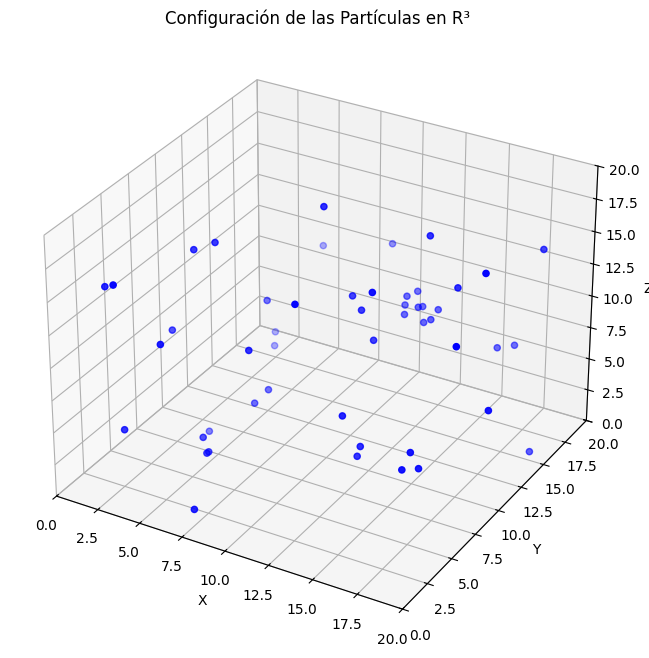

Con una potencial total de:
-33.75093419632686


In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def Genetic(Robots, epochs = 10000):
    N = int(0.5*len(Robots)) #Vamos a guardar la mitad
    Fitness = np.array([]) #Aquí vamos a guardar la energía promedio después de cada época
    for e in range(int(epochs)):
        for i,p in enumerate(Robots):
            p.Mutate() #Mutamos la lista de los robots
            p.SetFitness() #Calculamos la energía para cada robot
        # Ordenamos los robots por energía de menor a mayor
        scores = [ (p.Fitness, p) for p in Robots ]
        scores.sort(key = lambda x: x[0], reverse = False)
        # Tomamos lo indices hasta el % porciento
        Temp = [r[1] for i,r in enumerate(scores) if i < N ]
        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])
        # Miramos la energía de cada robot
        Fitness_ = [  r.GetFitness() for i,r in enumerate(Robots) ]
        # Guardamos la energía promedio
        Fitness = np.append(Fitness,np.mean(Fitness_))
        best_configuration = max(Robots, key=lambda r: r.GetFitness())

    ax1 = Plotter(e)
    ax1.set_title('Learning curve')
    ax1.plot(Fitness,color='k')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Energia')
    plt.show()
    return best_configuration.GetR(), TotalEnergy(best_configuration.GetR())


Robots = GetRobots(50)
Best = Genetic(Robots)

print("La mejor configuración encontrada está dada por la gráfica en R3:")
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = Best[0][:, 0]
y = Best[0][:, 1]
z = Best[0][:, 2]
ax.scatter(x, y, z, c='b', marker='o')
ax.set_title('Configuración de las Partículas en R³')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 20)
plt.show()

print("Con una potencial total de:")
print(f"{Best[1]}")